In [10]:
from fastai.basics import *
from fastai.callback.all import *
from fastai.vision.all import *
import ipywidgets as widgets

import warnings
warnings.filterwarnings('ignore')

# The Selfie Classifier!

You need to know whether you're being chased by a dangerous grizzly, or a sweet teddy bear, and you need an answer *fast*? Then you've come to the right place. Take a pic of the potentially vicious killer, and click 'upload' to classify it. (Important: this only handles grizzly bears, black bears, and teddy bears. It will **not** give a sensible answer for polar bears, a bear market, a bear of a man, or hot dogs.

----

SELFIE with 99.98% probability


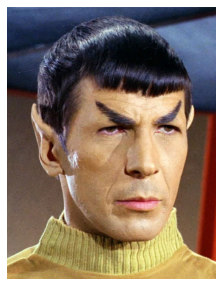

SELFIE with 98.91% probability


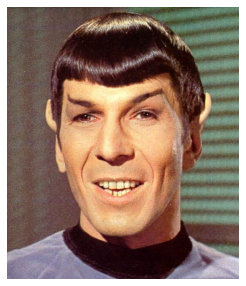

HEADSHOT with 99.93% probability


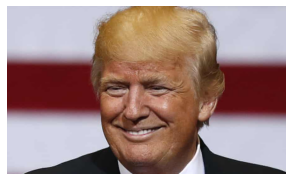

In [11]:
def get_sample_filepath(sample): return Path(sample.filepath)

def get_sample_label(sample): return sample.ground_truth.label

class SelfieDetectorApp():
  def __init__(self, learner):
    self.learner = learner
    self.label = widgets.Label("Welcome to the Selfie detector. Upload your image below")
    self.uploader = widgets.FileUpload(multiple=False)
    self.uploader.observe(self._on_upload, names='data')

  def _on_upload(self, change):
    widget = change['owner']
    img = PILImage.create(widget.data[0])
    show_image(img)
    self._predict(img)

  def _predict(self, img):
      class_name, prob_idx, probs = self.learner.predict(img)
      print(f"{class_name.upper()} with {probs[prob_idx.item()]*100:.2f}% probability")

  def show(self):
    return widgets.VBox([self.label, self.uploader])

path = Path('/content/drive/MyDrive')
learn_inf = load_learner(path/'export.pkl', cpu=True)
app = SelfieDetectorApp(learn_inf)
app.show()